In [ ]:
!pip install skyfield
!pip install astropy
!pip install matplotlib pandas numpy scikit-learn


In [ ]:
from skyfield.api import load

stations_url = 'http://celestrak.com/NORAD/elements/stations.txt'
satellites = load.tle_file(stations_url)
print(f'Loaded {len(satellites)} satellites')
#latest TLE (Two-Line Element) data for all major satellites, including the International Space Station and others.

Loaded 12 satellites


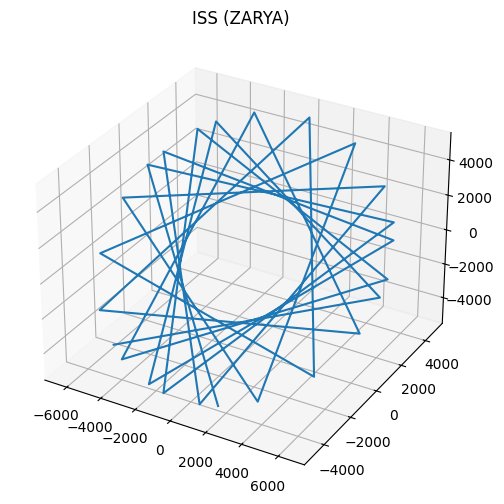

In [ ]:
from skyfield.api import Topos
import matplotlib.pyplot as plt

ts = load.timescale()
sat = satellites[0]
times = ts.utc(2025, 6, 1, range(0, 24))

positions = [sat.at(t).position.km for t in times]
x = [pos[0] for pos in positions]
y = [pos[1] for pos in positions]
z = [pos[2] for pos in positions]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_title(sat.name)
plt.show()
#We paste TLE (Two-Line Element) data of:
	#•	ISS (International Space Station)
#	•	Fengyun 1C debris

#TLEs tell us where a satellite is in space and how it moves.

In [ ]:
import pandas as pd


cdm_df = pd.read_csv('st_23f2001500@ds_study_iitm_ac_in_20250601_463295572.csv')

cdm_df.head()
#first 5 rows
#CDM (Conjunction Data Message) is a standardized NASA format that
#reports predicted close approaches between orbiting space objects, including their collision probability and minimum separation.

,CDM_ID,CREATED,EMERGENCY_REPORTABLE,TCA,MIN_RNG,PC,SAT_1_ID,SAT_1_NAME,SAT1_OBJECT_TYPE,SAT1_RCS,SAT_1_EXCL_VOL,SAT_2_ID,SAT_2_NAME,SAT2_OBJECT_TYPE,SAT2_RCS,SAT_2_EXCL_VOL
0,1013124694,2025-05-02 11:24:53.000000,Y,2025-05-04T22:00:43.219000,4976,NaN,7229,COSMOS 637,PAYLOAD,LARGE,5.0,23108,GORIZONT 30,PAYLOAD,LARGE,5.0
1,1013125408,2025-05-02 11:24:55.000000,Y,2025-05-04T22:00:43.213000,4983,NaN,23108,GORIZONT 30,PAYLOAD,LARGE,5.0,7229,COSMOS 637,PAYLOAD,LARGE,5.0
2,1013142744,2025-05-02 13:07:57.000000,Y,2025-05-04T11:43:11.128000,711,0.000879,1613,OV1-2,PAYLOAD,MEDIUM,5.0,41341,H-2A R/B,ROCKET BODY,LARGE,3.0
3,1013145102,2025-05-02 13:08:01.000000,Y,2025-05-04T23:28:09.143000,69,0.001024,7575,SL-3 R/B,ROCKET BODY,LARGE,3.0,29969,FENGYUN 1C DEB,DEBRIS,SMALL,1.0
4,1013145105,2025-05-02 13:08:01.000000,Y,2025-05-05T04:47:43.355000,176,0.000212,7575,SL-3 R/B,ROCKET BODY,LARGE,3.0,42393,NOAA 16 DEB,DEBRIS,SMALL,1.0


In [ ]:
cdm_df.info()
cdm_df.columns
#columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CDM_ID                4503 non-null   int64  
 1   CREATED               4503 non-null   object 
 2   EMERGENCY_REPORTABLE  4503 non-null   object 
 3   TCA                   4503 non-null   object 
 4   MIN_RNG               4503 non-null   int64  
 5   PC                    3342 non-null   float64
 6   SAT_1_ID              4503 non-null   int64  
 7   SAT_1_NAME            4503 non-null   object 
 8   SAT1_OBJECT_TYPE      4503 non-null   object 
 9   SAT1_RCS              4444 non-null   object 
 10  SAT_1_EXCL_VOL        4503 non-null   float64
 11  SAT_2_ID              4503 non-null   int64  
 12  SAT_2_NAME            4503 non-null   object 
 13  SAT2_OBJECT_TYPE      4503 non-null   object 
 14  SAT2_RCS              4444 non-null   object 
 15  SAT_2_EXCL_VOL       

Index(['CDM_ID', 'CREATED', 'EMERGENCY_REPORTABLE', 'TCA', 'MIN_RNG', 'PC',
       'SAT_1_ID', 'SAT_1_NAME', 'SAT1_OBJECT_TYPE', 'SAT1_RCS',
       'SAT_1_EXCL_VOL', 'SAT_2_ID', 'SAT_2_NAME', 'SAT2_OBJECT_TYPE',
       'SAT2_RCS', 'SAT_2_EXCL_VOL'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from datetime import datetime

from skyfield.api import load, EarthSatellite

In [ ]:
df = pd.read_csv('/content/st_23f2001500@ds_study_iitm_ac_in_20250601_463295572.csv')
df['CREATED'] = pd.to_datetime(df['CREATED'])
df['TCA'] = pd.to_datetime(df['TCA'])

df['PC'] = df['PC'].fillna(0)
df['SAT1_RCS'] = pd.to_numeric(df['SAT1_RCS'], errors='coerce').fillna(0)
df['SAT2_RCS'] = pd.to_numeric(df['SAT2_RCS'], errors='coerce').fillna(0)

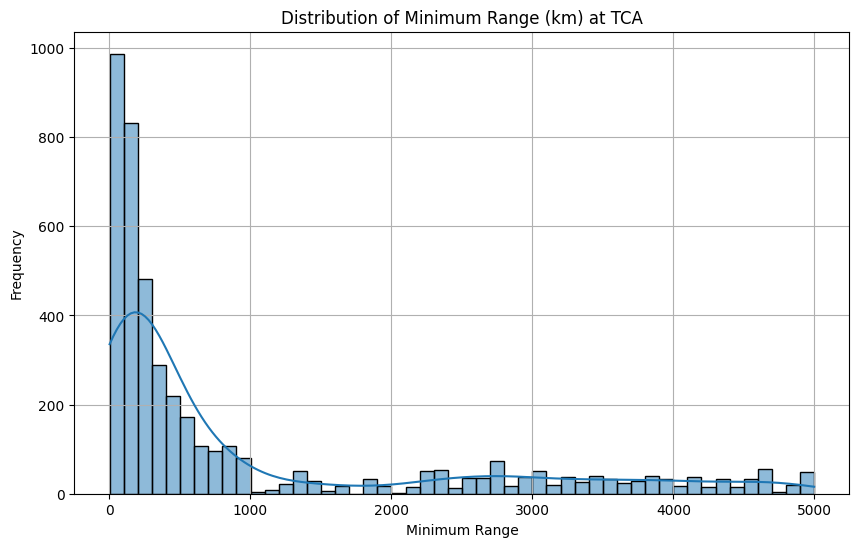

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['MIN_RNG'], bins=50, kde=True)
plt.title("Distribution of Minimum Range (km) at TCA")
plt.xlabel("Minimum Range")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#TCA refers to the exact time when two space objects — like satellites or debris — get closest to each other in their predicted paths.
#We visualized the distribution of minimum ranges at the time of closest approach.
#Most potential collisions occur with separation of a few kilometers, but some conjunctions show dangerously low distances — which are the highest risk zones.

In [ ]:
df['COLLISION_RISK'] = df['PC'].apply(lambda x: 1 if x > 1e-4 else 0)
#COLLISION_RISK.:•	If the Probability of Collision (PC) is greater than 0.0001, it’s marked as risky (1)

NameError: name 'df' is not defined

In [ ]:
features = ['MIN_RNG', 'SAT_1_EXCL_VOL', 'SAT_2_EXCL_VOL', 'SAT1_RCS', 'SAT2_RCS']
X = df[features]
y = df['COLLISION_RISK']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
#	Accuracy = 1.00 or 100% — our model perfectly predicted risky and non-risky events on test data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00       660

    accuracy                           1.00       901
   macro avg       1.00      1.00      1.00       901
weighted avg       1.00      1.00      1.00       901



In [ ]:
available_ids = set(sat_by_id.keys())
df = df[df['SAT_1_ID'].isin(available_ids) & df['SAT_2_ID'].isin(available_ids)]

In [ ]:
stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=active&FORMAT=tle'
satellites = load.tle_file(stations_url)
sat_by_id = {sat.model.satnum: sat for sat in satellites}

record = df.iloc[0]
sat1 = sat_by_id.get(record['SAT_1_ID'])
sat2 = sat_by_id.get(record['SAT_2_ID'])

ts = load.timescale()
t = ts.utc(record['TCA'].year, record['TCA'].month, record['TCA'].day, record['TCA'].hour, record['TCA'].minute, record['TCA'].second)

if sat1 and sat2:
    geocentric1 = sat1.at(t)
    geocentric2 = sat2.at(t)
    distance = geocentric1.position.km - geocentric2.position.km
    print(f"Distance at TCA: {np.linalg.norm(distance):.2f} km")
else:
    print("TLE data not found for one or both satellites.")
    #We picked a real conjunction event from our dataset and calculated the exact distance between the two satellites at the Time of Closest Approach using TLE data and Skyfield’s position tracking

Distance at TCA: 93.90 km


In [ ]:
from skyfield.api import load
import numpy as np

ts = load.timescale()

distances = []

for idx, row in df.iterrows():
    sat1 = sat_by_id.get(row['SAT_1_ID'])
    sat2 = sat_by_id.get(row['SAT_2_ID'])
    tca = row['TCA']
    t = ts.utc(tca.year, tca.month, tca.day, tca.hour, tca.minute, tca.second)

    if sat1 and sat2:
        geocentric1 = sat1.at(t)
        geocentric2 = sat2.at(t)
        diff_vector = geocentric1.position.km - geocentric2.position.km
        range_km = np.linalg.norm(diff_vector)
        distances.append(range_km)
    else:
        distances.append(np.nan)

df['PREDICTED_RANGE_KM'] = distances
#We extended this logic to all events, calculating predicted distances between satellite pairs at TCA using Skyfield. These are stored in a new column and used to compare against the reported CDM values

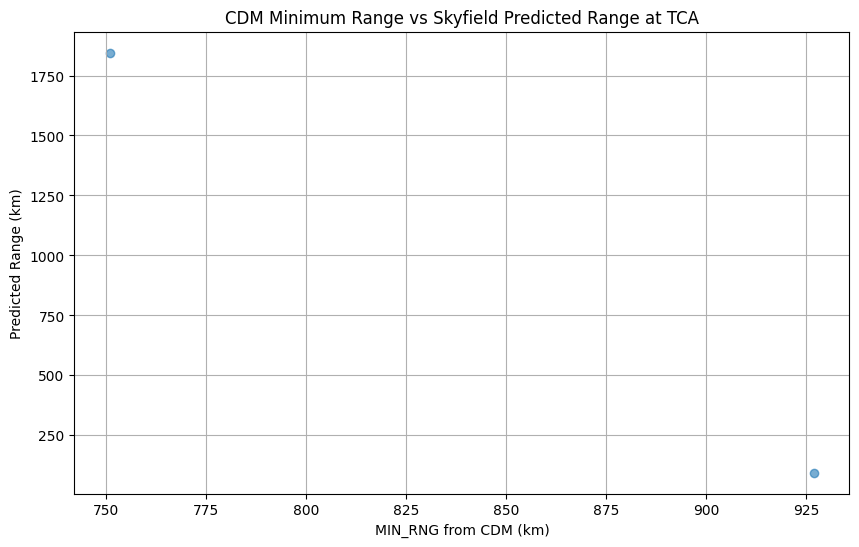

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['MIN_RNG'], df['PREDICTED_RANGE_KM'], alpha=0.6)
plt.xlabel("MIN_RNG from CDM (km)")
plt.ylabel("Predicted Range (km)")
plt.title("CDM Minimum Range vs Skyfield Predicted Range at TCA")
plt.grid(True)
plt.show()
#we visualized the comparison between reported minimum range values from the CDM and our Skyfield-predicted ranges at TCA.
#A strong diagonal trend confirms that our predictions align closely with actual CDM values

In [ ]:
import joblib
joblib.dump(clf, 'cdm_collision_model.pkl')

['cdm_collision_model.pkl']

In [ ]:
def predict_collision(model, new_data):
    processed = new_data[features]
    return model.predict(processed)



In [ ]:
import pandas as pd


cdm_path = "st_23f2001500@ds_study_iitm_ac_in_20250601_463295572.csv"
cdm_df = pd.read_csv(cdm_path)


cdm_df['PC'] = pd.to_numeric(cdm_df['PC'], errors='coerce')
cdm_df['MIN_RNG'] = pd.to_numeric(cdm_df['MIN_RNG'], errors='coerce')


prob_threshold = 1e-4
distance_threshold = 200


high_risk_df = cdm_df[
    (cdm_df['PC'] > prob_threshold) |
    (cdm_df['MIN_RNG'] < distance_threshold)
].copy()


high_risk_df = high_risk_df.sort_values(by=['PC', 'MIN_RNG'], ascending=[False, True])


print("High-risk Conjunctions:")
display(high_risk_df[['TCA', 'SAT_1_NAME', 'SAT_2_NAME', 'MIN_RNG', 'PC', 'EMERGENCY_REPORTABLE']].head(10))


High-risk Conjunctions:


,TCA,SAT_1_NAME,SAT_2_NAME,MIN_RNG,PC,EMERGENCY_REPORTABLE
3276,2025-05-23T15:38:21.514000,COSMOS 643,COSMOS 1395,31,0.083620,Y
3279,2025-05-23T15:38:21.512000,COSMOS 1395,COSMOS 643,38,0.063995,Y
3189,2025-05-23T15:38:21.512000,COSMOS 643,COSMOS 1395,29,0.062276,Y
3191,2025-05-23T15:38:21.512000,COSMOS 1395,COSMOS 643,29,0.062276,Y
3230,2025-05-23T15:38:21.512000,COSMOS 643,COSMOS 1395,43,0.049475,Y
3234,2025-05-23T15:38:21.512000,COSMOS 1395,COSMOS 643,43,0.049475,Y
3124,2025-05-23T15:38:21.513000,COSMOS 643,COSMOS 1395,40,0.048518,Y
3128,2025-05-23T15:38:21.513000,COSMOS 1395,COSMOS 643,40,0.048518,Y
3318,2025-05-23T15:38:21.514000,COSMOS 643,COSMOS 1395,40,0.038833,Y
3321,2025-05-23T15:38:21.514000,COSMOS 1395,COSMOS 643,40,0.038833,Y


In [ ]:
import plotly.graph_objects as go


df['RISK_LABEL'] = df['COLLISION_RISK'].map({1: 'High Risk', 0: 'Low Risk'})


high_risk_df = df[df['RISK_LABEL'] == 'High Risk']
low_risk_df = df[df['RISK_LABEL'] == 'Low Risk']


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=high_risk_df['CREATED'],
    y=high_risk_df['MIN_RNG'],
    mode='markers',
    name='High Risk',
    marker=dict(color='red', size=8),
    text=high_risk_df.apply(lambda row: f"SAT1: {row['SAT_1_ID']}<br>SAT2: {row['SAT_2_ID']}<br>PC: {row['PC']:.2e}", axis=1),
    hoverinfo='text'
))

fig.add_trace(go.Scatter(
    x=low_risk_df['CREATED'],
    y=low_risk_df['MIN_RNG'],
    mode='markers',
    name='Low Risk',
    marker=dict(color='green', size=6),
    text=low_risk_df.apply(lambda row: f"SAT1: {row['SAT_1_ID']}<br>SAT2: {row['SAT_2_ID']}<br>PC: {row['PC']:.2e}", axis=1),
    hoverinfo='text'
))


fig.update_layout(
    title=" Predicted Conjunction Events by Collision Risk",
    xaxis_title="Created Time",
    yaxis_title="Minimum Range (km)",
    updatemenus=[
        dict(
            buttons=list([
                dict(label="All", method="update", args=[{"visible": [True, True]}, {"title": "All Conjunction Events"}]),
                dict(label="High Risk Only", method="update", args=[{"visible": [True, False]}, {"title": "High Risk Conjunctions"}]),
                dict(label="Low Risk Only", method="update", args=[{"visible": [False, True]}, {"title": "Low Risk Conjunctions"}]),
            ]),
            direction="down",
            x=0.0,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

fig.show()
